In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("User study results.csv")
data = data.dropna().reset_index(drop=True)
data

Label   Task1   Task2   Task3   Task4  Py (Year)  Jup (Rating)
0   Group1  Failed   02:05  Failed   10:06        4.0           2.0
1   Group1   06:57   01:37   06:29   06:02        4.0           4.0
2   Group1   10:13   01:32   08:21   04:33        3.0           5.0
3   Group1  Failed   03:28  Failed   08:07        0.5           3.0
4   Group1   02:26   03:08   08:52   11:55        3.0           3.0
5   Group2  Failed   11:31  Failed   05:29        7.0           4.0
6   Group2  Failed   04:29   04:42   04:43        6.0           5.0
7   Group2  Failed   05:38   06:56   07:33        1.0           3.0
8   Group2  Failed   04:44   08:38   04:36        3.0           3.0
9   Group2  Failed   02:17   04:34   04:39        4.0           3.0
10  Group3  Failed   03:46   07:12   04:51        3.0           5.0
11  Group3  Failed  Failed   03:41   03:49        3.0           4.0
12  Group3  Failed   04:40   08:32   03:37        2.0           2.0
13  Group3   10:16   04:12   06:44   03:34        4.0           5.0
14  Group3  Failed   06:32   06:16   02:02        2.0           2.0
15  Group4   04:20   07:03   11:40  Failed        2.0           5.0
16  Group4   07:07   03:34  Failed   07:02        3.0           5.0
17  Group4   03:21   03:07  Failed   11:32        3.0           3.0
18  Group4   05:59   01:50  Failed   07:40        4.0           4.0
19  Group4   03:01   03:14   10:16   09:05        2.0           3.0

In [9]:
def time2second(x):
    if x.startswith("Group"):
        return x
    if x=="Failed":
        return 12
    else:
        ls = x.split(":")
        return float(ls[0])+float(ls[1])/60
data2 = data.copy()
tasks = ["Task1", "Task2", "Task3", "Task4"]
data2[tasks] = data2[tasks].applymap(time2second)
# data2 = data2.drop(columns = ["Py (Year)", "Jup (Rating)"])

In [10]:
def to_group(x):
    return "With Tool" if int(x[-1]) in [1,4] else "Without Tool"
def to_group2(x):
    return "With Tool" if int(x[-1]) in [2,3] else "Without Tool"
data2["Label1"] = data2["Label"].map(to_group)
data2["Label2"] = data2["Label"].map(to_group2)
data2["Order1"] = [1]*10+[2]*10
data2["Order2"] = [2]*10+[1]*10
data2

Label      Task1      Task2      Task3      Task4  Py (Year)  \
0   Group1  12.000000   2.083333  12.000000  10.100000        4.0   
1   Group1   6.950000   1.616667   6.483333   6.033333        4.0   
2   Group1  10.216667   1.533333   8.350000   4.550000        3.0   
3   Group1  12.000000   3.466667  12.000000   8.116667        0.5   
4   Group1   2.433333   3.133333   8.866667  11.916667        3.0   
5   Group2  12.000000  11.516667  12.000000   5.483333        7.0   
6   Group2  12.000000   4.483333   4.700000   4.716667        6.0   
7   Group2  12.000000   5.633333   6.933333   7.550000        1.0   
8   Group2  12.000000   4.733333   8.633333   4.600000        3.0   
9   Group2  12.000000   2.283333   4.566667   4.650000        4.0   
10  Group3  12.000000   3.766667   7.200000   4.850000        3.0   
11  Group3  12.000000  12.000000   3.683333   3.816667        3.0   
12  Group3  12.000000   4.666667   8.533333   3.616667        2.0   
13  Group3  10.266667   4.200000   6.733333   3.566667        4.0   
14  Group3  12.000000   6.533333   6.266667   2.033333        2.0   
15  Group4   4.333333   7.050000  11.666667  12.000000        2.0   
16  Group4   7.116667   3.566667  12.000000   7.033333        3.0   
17  Group4   3.350000   3.116667  12.000000  11.533333        3.0   
18  Group4   5.983333   1.833333  12.000000   7.666667        4.0   
19  Group4   3.016667   3.233333  10.266667   9.083333        2.0   

    Jup (Rating)        Label1        Label2  Order1  Order2  
0            2.0     With Tool  Without Tool       1       2  
1            4.0     With Tool  Without Tool       1       2  
2            5.0     With Tool  Without Tool       1       2  
3            3.0     With Tool  Without Tool       1       2  
4            3.0     With Tool  Without Tool       1       2  
5            4.0  Without Tool     With Tool       1       2  
6            5.0  Without Tool     With Tool       1       2  
7            3.0  Without Tool     With Tool       1       2  
8            3.0  Without Tool     With Tool       1       2  
9            3.0  Without Tool     With Tool       1       2  
10           5.0  Without Tool     With Tool       2       1  
11           4.0  Without Tool     With Tool       2       1  
12           2.0  Without Tool     With Tool       2       1  
13           5.0  Without Tool     With Tool       2       1  
14           2.0  Without Tool     With Tool       2       1  
15           5.0     With Tool  Without Tool       2       1  
16           5.0     With Tool  Without Tool       2       1  
17           3.0     With Tool  Without Tool       2       1  
18           4.0     With Tool  Without Tool       2       1  
19           3.0     With Tool  Without Tool       2       1

In [11]:
data3 = []
for i, v in data2.iterrows():
    for task in ['Task1', 'Task2']:
        data3.append([v[task], int(task[-1]), v['Label1'] == 'With Tool', v['Order1'] == 1, v['Py (Year)'], v['Jup (Rating)']])
    for task in ['Task3', 'Task4']:
        data3.append([v[task], int(task[-1]), v['Label2'] == 'With Tool', v['Order2'] == 1, v['Py (Year)'], v['Jup (Rating)']])
df3 = pd.DataFrame(data3, columns=['time', 'tasknum', 'withtool', 'isfirst', 'py-year', 'jup-rating'])
df3.to_csv('result.csv')

In [12]:
std = data2.groupby("Label1").std().transpose().loc[["Task1", "Task2"]].append(data2.groupby("Label2").std().transpose().loc[["Task3", "Task4"]])
mean = data2.groupby("Label1").mean().transpose().loc[["Task1", "Task2"]].append(data2.groupby("Label2").mean().transpose().loc[["Task3", "Task4"]])
data2.groupby("Label1").count()
1-sum(mean["With Tool"]/mean["Without Tool"])/4

0.43814169043509643

In [13]:
stds = []
for col in ["With Tool", "Without Tool"]:
    stds.append(list(std[col]))
stds

[[3.6190186924491416,
  1.6073864992666484,
  2.422747776827678,
  1.440401392959444],
 [0.5481281277625187,
  3.2416221552690043,
  2.0013699012130366,
  2.577344312214359]]

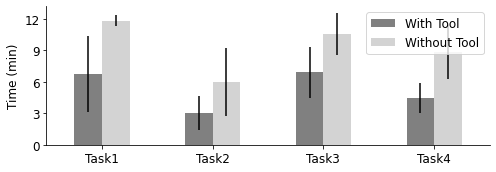

In [14]:
import seaborn
ax = mean.plot(kind='bar', yerr=stds, figsize=(7,2.5), color=['grey', 'lightgrey'], rot=0, fontsize=12)
seaborn.despine(right=True)
plt.ylabel(ylabel="Time (min)", fontsize=12)
plt.yticks([0,3,6,9,12])
ax.legend(loc = 1, fontsize=12)
plt.tight_layout()
plt.savefig('plot1.pdf')

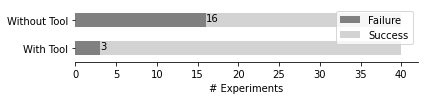

In [15]:
df = pd.DataFrame({"Failure": [3, 16], "Success": [37, 24]}, index=["With Tool", "Without Tool"])

ax = df.plot(kind='barh', figsize=(6,1.5), color=['grey', 'lightgrey'], stacked=True)
ax.set_xlabel('# Experiments')
for i, v in enumerate([3, 16]):
    ax.text(v, i-0.05, str(v), color='black')
seaborn.despine(left=True, right=True)
plt.tight_layout()
plt.savefig('plot2.pdf')

In [16]:
task_dict = {
    "Task1": [data2.groupby("Label1").get_group("With Tool")["Task1"], data2.groupby("Label1").get_group("Without Tool")["Task1"]],
    "Task2": [data2.groupby("Label1").get_group("With Tool")["Task2"], data2.groupby("Label1").get_group("Without Tool")["Task2"]],
    "Task3": [data2.groupby("Label2").get_group("With Tool")["Task3"], data2.groupby("Label2").get_group("Without Tool")["Task3"]],
    "Task4": [data2.groupby("Label2").get_group("With Tool")["Task4"], data2.groupby("Label2").get_group("Without Tool")["Task4"]]
}

In [17]:
from scipy.stats import ttest_rel, linregress, pearsonr
import numpy as np

for key in tasks:
    ttest,pval = ttest_rel(task_dict[key][0], task_dict[key][1])
    print("p-value",pval)

p-value 0.0016160567789355958
p-value 0.039248959410666306
p-value 0.0007313575492888426
p-value 0.002843774917578231


In [18]:
data2

Label      Task1      Task2      Task3      Task4  Py (Year)  \
0   Group1  12.000000   2.083333  12.000000  10.100000        4.0   
1   Group1   6.950000   1.616667   6.483333   6.033333        4.0   
2   Group1  10.216667   1.533333   8.350000   4.550000        3.0   
3   Group1  12.000000   3.466667  12.000000   8.116667        0.5   
4   Group1   2.433333   3.133333   8.866667  11.916667        3.0   
5   Group2  12.000000  11.516667  12.000000   5.483333        7.0   
6   Group2  12.000000   4.483333   4.700000   4.716667        6.0   
7   Group2  12.000000   5.633333   6.933333   7.550000        1.0   
8   Group2  12.000000   4.733333   8.633333   4.600000        3.0   
9   Group2  12.000000   2.283333   4.566667   4.650000        4.0   
10  Group3  12.000000   3.766667   7.200000   4.850000        3.0   
11  Group3  12.000000  12.000000   3.683333   3.816667        3.0   
12  Group3  12.000000   4.666667   8.533333   3.616667        2.0   
13  Group3  10.266667   4.200000   6.733333   3.566667        4.0   
14  Group3  12.000000   6.533333   6.266667   2.033333        2.0   
15  Group4   4.333333   7.050000  11.666667  12.000000        2.0   
16  Group4   7.116667   3.566667  12.000000   7.033333        3.0   
17  Group4   3.350000   3.116667  12.000000  11.533333        3.0   
18  Group4   5.983333   1.833333  12.000000   7.666667        4.0   
19  Group4   3.016667   3.233333  10.266667   9.083333        2.0   

    Jup (Rating)        Label1        Label2  Order1  Order2  
0            2.0     With Tool  Without Tool       1       2  
1            4.0     With Tool  Without Tool       1       2  
2            5.0     With Tool  Without Tool       1       2  
3            3.0     With Tool  Without Tool       1       2  
4            3.0     With Tool  Without Tool       1       2  
5            4.0  Without Tool     With Tool       1       2  
6            5.0  Without Tool     With Tool       1       2  
7            3.0  Without Tool     With Tool       1       2  
8            3.0  Without Tool     With Tool       1       2  
9            3.0  Without Tool     With Tool       1       2  
10           5.0  Without Tool     With Tool       2       1  
11           4.0  Without Tool     With Tool       2       1  
12           2.0  Without Tool     With Tool       2       1  
13           5.0  Without Tool     With Tool       2       1  
14           2.0  Without Tool     With Tool       2       1  
15           5.0     With Tool  Without Tool       2       1  
16           5.0     With Tool  Without Tool       2       1  
17           3.0     With Tool  Without Tool       2       1  
18           4.0     With Tool  Without Tool       2       1  
19           3.0     With Tool  Without Tool       2       1

In [19]:
for key in tasks:
    result = linregress(list(data2[key]), list(data2["Py (Year)"]))
    print("p-value", result.pvalue)
    
print("-"*10)

for key in tasks:
    result = linregress(list(data2[key]), list(data2["Jup (Rating)"]))
    print("p-value", result.pvalue)
    
print("-"*10)
    
for key in tasks:
    result = linregress(list(data2[key]), list(data2["Order1"]))
    print("p-value", result.pvalue)
    
print("-"*10)

for key in tasks:
    result = linregress(list(data2[key]), list(data2["Order2"]))
    print("p-value", result.pvalue)
    
print("-"*10)
    
result = linregress([1,2,3], [1000,2000,3008])
print("p-value", result.pvalue)

#     result = linregress(list(data2[key]), list(data2["Label1"].map(lambda x: 0 if x=="Without Tool" else 1)))

p-value 0.5909895131674857
p-value 0.4716069933143975
p-value 0.7090426942497707
p-value 0.3984047591262234
----------
p-value 0.6595166028938817
p-value 0.7756986210259711
p-value 0.7226165968537415
p-value 0.7001561827517595
----------
p-value 0.19168871004099716
p-value 0.4804630309176624
p-value 0.6612162198865745
p-value 0.8572671524621708
----------
p-value 0.19168871004099716
p-value 0.4804630309176624
p-value 0.6612162198865745
p-value 0.8572671524621708
----------
p-value 0.001464350393324486


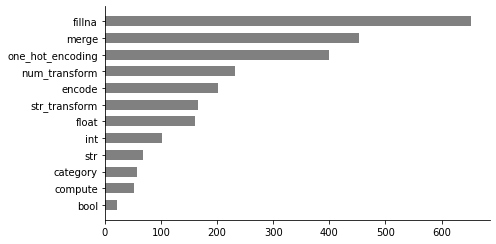

In [28]:
D = {
    "fillna": 653,
    "merge": 453,
    "one_hot_encoding": 400,
#     "removecol": 345,
    "num_transform": 232,
#     "removerow":203,
    "encode":201,
    "str_transform":166,
    "float":161,
#     "rearrange_row":116,
    "int":102,
    "str":68,
    "category":58,
#     "removerow_null":51,
    "compute":51,
#     "rearrange":27,
    "bool":22,
#     "datetime64":11,
#     "type_convert":1,
#     "removerow_dup":1
}

fig = plt.figure(figsize=(7,3.5))
plt.barh(range(len(D)), list(D.values())[::-1], height=0.6, align='center', color="grey")
plt.yticks(range(len(D)), list(D.keys())[::-1])
seaborn.despine(right=True)

plt.tight_layout()
plt.savefig('patterns.pdf')

<Figure size 504x288 with 0 Axes>

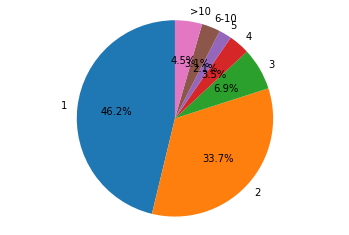

In [82]:
D = {
    "1": 466,
    "2": 340,
    "3": 70,
    "4": 35,
    "5": 21,
    "6-10": 31,
    ">10":45
}

fig = plt.figure(figsize=(7,4))
fig1, ax1 = plt.subplots()
ax1.pie(D.values(), labels=D.keys(), autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# fig = plt.figure(figsize=(7,4))
# plt.barh(range(len(D)), list(D.values())[::-1], align='center', color="grey")
# plt.yticks(range(len(D)), list(D.keys())[::-1])

plt.tight_layout()
plt.savefig('branches.pdf')

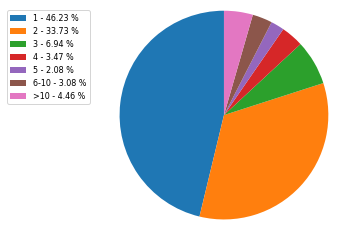

In [101]:
x = D.keys()
y = np.array(list(D.values()))
colors = ['yellowgreen','red','gold','lightskyblue','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

# sort_legend = True
# if sort_legend:
#     patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
#                                           key=lambda x: x[2],
#                                           reverse=True))

plt.legend(patches, labels,  bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.savefig('branches.pdf')

In [20]:
x = '''
category(merge()) 27
category() 21
one_hot_encoding() 1953
merge() 151
num_transform() 139
str(merge()) 43
fillna() 504
one_hot_encoding(num_transform()) 3
one_hot_encoding(merge()) 93
one_hot_encoding(fillna()) 20
int() 18
int(fillna()) 9
int(merge()) 50
str_transform() 98
encode() 73
encode(num_transform()) 13
one_hot_encoding(fillna(merge())) 6
compute() 51
encode(merge()) 53
encode(fillna(merge())) 14
int(fillna(merge())) 3
category(fillna(merge())) 9
encode(fillna()) 55
int(str_transform()) 21
bool(fillna(merge())) 9
bool(fillna()) 8
bool(merge()) 14
merge(fillna()) 24
str(fillna(num_transform())) 1
float(merge()) 39
category(num_transform()) 1
float(num_transform()) 58
str() 1
str(num_transform()) 58
float(str_transform()) 79
float() 15
str(fillna(merge())) 1
str(fillna()) 2
fillna(str_transform()) 1
datetime64() 10
type_convert() 2
encode(int()) 1
float(fillna(merge())) 2
datetime64(merge()) 1
'''.split('\n')

D = {y.split(' ')[0]: int(y.split(' ')[1]) for y in x if y !=''}
cnt = [0, 0, 0]
for k, v in D.items():
    if k == 'compute()':
        cnt[2] += v
    elif k.endswith('()'):
        cnt[0] += v
    elif k.endswith('())'):
        cnt[1] += v
    elif k.endswith('()))'):
        cnt[1] += v

print(sum(D.values()))
print(sum(cnt))
# sum([v  if k.endswith('():')])
cnt

3754
3754


[2985, 718, 51]

In [27]:
x = '''
replace 173
strip 14
loc/at 185
replace_ls 18
split 77
fillna 421
extract 24
map_dict 47
get_dummies 102
set 16
dropna 57
others 67
if_expr 39'''.split('\n')
D = {y.split(' ')[0]: int(y.split(' ')[1]) for y in x if y !=''}

sum(D.values())

1240

In [71]:
l1 = [0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1]

In [76]:
l2 = [0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1]

In [77]:
l3 = pd.read_csv('titanic/submission_titanic.csv')['Survived'].to_list()

In [78]:
sum([a==b for a,b in zip(l1, l3)])/len(l2)

0.7703349282296651

In [79]:
sum([a==b for a,b in zip(l2, l3)])/len(l2)

0.7631578947368421

In [69]:
df = pd.read_csv('titanic/submission.csv')
df['Survived'] = l2
df.to_csv('titanic/test2.csv', index=False)
df

PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]

In [219]:
from statsmodels.stats.inter_rater import fleiss_kappa
data = pd.read_csv("Correctness Evaluation.csv")
data.drop(columns=["Timestamp"], inplace=True)
data = data.applymap(lambda x: 1 if x=="Correct" else 0)
N = len(data)
data2 = pd.DataFrame({"yes":data.apply(lambda x:sum(x)), "no": data.apply(lambda x:N-sum(x))})
# data.loc["titanic-best-working-classifier.html#019[train]"] = [4,0]
# data.loc["machine-learning-to-predict-app-ratings.html#044[X]"] = [0,4]
p1=sum(data2.apply(lambda x:(sum([i**2 for i in x])-N)/(N*(N-1)), axis=1))/20
p2=sum([i**2 for i in data2.apply(lambda x:sum(x)/(20*N))])
# fleiss_kappa([[4,0],[4,0]])
# p1 = sum(data["yes"])/80
(p1-p2)/(1-p2)

0.19191919191919002

In [215]:
# from sklearn.metrics import cohen_kappa_score
# cohen_kappa_score([data.values[3]], data.values[1])
data.apply(lambda x:sum(x))

nyc-airbnb-eda-visualization-regression.html#012[data]                2
a-statistical-analysis-ml-workflow-of-titanic.html#160[train]         2
nyc-airbnb-analysis-eda-price-prediction-xgb-rf.html#038[data]        2
fifa-19-eda-data-visualization.html#068[data_new]                     2
titanic-best-working-classifier.html#019[train]                       0
comprehensive-eda-viz-linear-regression.html#019[df]                  2
titanic-advanced-feature-engineering-tutorial.html#003[df_train]      2
titanic-top-4-with-ensemble-modeling.html#012[dataset]                2
eda-fifa-19-pandas-profiling-beginner.html#004[df]                    2
ml-to-visualization-prediction-of-app-ratings.html#054[v2]            2
google-app-play-store.html#012[data]                                  2
nyc-airbnb-analysis-eda-price-prediction-xgb-rf.html#015[describe]    2
fifa-19-player-data-analysis-and-visualization-eda.html#013[df]       2
an-interactive-data-science-tutorial.html#047[train_X]          

In [122]:
from nltk import agreement
rater1 = [1,1,1]
rater2 = [1,1,0]
rater3 = [0,1,1]

taskdata = []
for i,_ in enumerate(data.index):
    taskdata += [[str(i), str(j), str(item)] for j, item in enumerate(data.iloc[i])]
ratingtask = agreement.AnnotationTask(data=taskdata)
print("kappa " +str(ratingtask.kappa()))
print("fleiss " + str(ratingtask.multi_kappa()))
print("alpha " +str(ratingtask.alpha()))
print("scotts " + str(ratingtask.pi()))
taskdata

kappa 0.14912280701754424
fleiss 0.1954022988505743
alpha 0.2020202020202021
scotts 0.19191919191918974


[['0', '0', '1'],
 ['0', '1', '1'],
 ['0', '2', '1'],
 ['0', '3', '1'],
 ['0', '4', '0'],
 ['0', '5', '1'],
 ['0', '6', '1'],
 ['0', '7', '1'],
 ['0', '8', '1'],
 ['0', '9', '1'],
 ['0', '10', '1'],
 ['0', '11', '1'],
 ['0', '12', '1'],
 ['0', '13', '1'],
 ['0', '14', '1'],
 ['0', '15', '1'],
 ['0', '16', '1'],
 ['0', '17', '1'],
 ['0', '18', '1'],
 ['0', '19', '1'],
 ['1', '0', '1'],
 ['1', '1', '1'],
 ['1', '2', '1'],
 ['1', '3', '1'],
 ['1', '4', '0'],
 ['1', '5', '1'],
 ['1', '6', '1'],
 ['1', '7', '1'],
 ['1', '8', '1'],
 ['1', '9', '1'],
 ['1', '10', '1'],
 ['1', '11', '1'],
 ['1', '12', '1'],
 ['1', '13', '1'],
 ['1', '14', '1'],
 ['1', '15', '1'],
 ['1', '16', '1'],
 ['1', '17', '1'],
 ['1', '18', '1'],
 ['1', '19', '1'],
 ['2', '0', '1'],
 ['2', '1', '1'],
 ['2', '2', '1'],
 ['2', '3', '1'],
 ['2', '4', '1'],
 ['2', '5', '1'],
 ['2', '6', '1'],
 ['2', '7', '1'],
 ['2', '8', '1'],
 ['2', '9', '1'],
 ['2', '10', '1'],
 ['2', '11', '1'],
 ['2', '12', '1'],
 ['2', '13', '1'],
 ['2